### **Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**



**1. import Libraries**

---



In [12]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

**2. Upload the Dataset**

In [6]:
# Define the URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'

# Download the dataset
response = requests.get(url)
with open('smsspamcollection.zip', 'wb') as file:
    file.write(response.content)

# Unzip the dataset
import zipfile
with zipfile.ZipFile('smsspamcollection.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Load the dataset into a DataFrame
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'text'])

# Display the first few rows of the DataFrame
print(df.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


**3. Inspect the DataFrame**

---



In [7]:
# Inspect the column names and data
print(df.columns)
print(df.head())


Index(['label', 'text'], dtype='object')
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


**4. Apply Sentiment Analysis**

---



In [8]:
# Map the label to sentiment
df['predicted_sentiment'] = df['label'].map({'ham': 'positive', 'spam': 'negative'})

# Display the updated dataset
print(df.head())


  label                                               text predicted_sentiment
0   ham  Go until jurong point, crazy.. Available only ...            positive
1   ham                      Ok lar... Joking wif u oni...            positive
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...            negative
3   ham  U dun say so early hor... U c already then say...            positive
4   ham  Nah I don't think he goes to usf, he lives aro...            positive


**5. Data Visualization**

---



<ipython-input-9-86da8afdeb3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


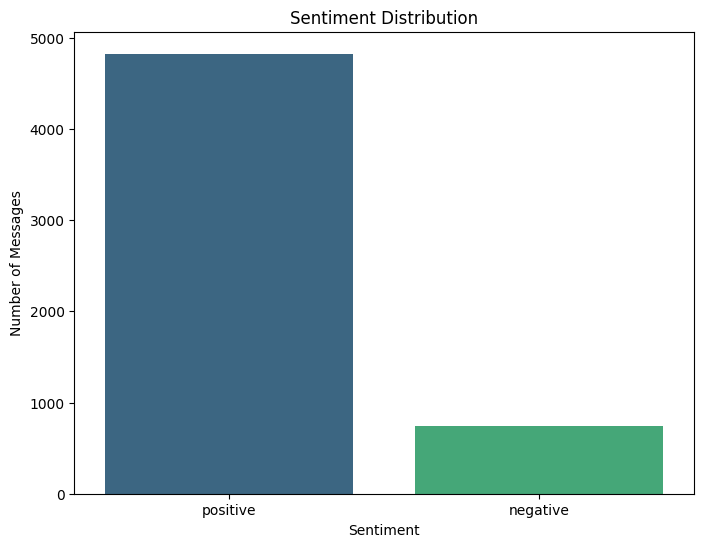

In [9]:
# Count the number of each sentiment
sentiment_counts = df['predicted_sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Messages')
plt.show()
